#Problem Statement
#A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

 

#They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

#Which variables are significant in predicting the price of a car
#How well those variables describe the price of a car
#Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

In [170]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [171]:
import numpy as np
import pandas as pd

In [172]:
Car_df = pd.read_csv("CarPrice_Assignment.csv")

In [173]:
# Check the head of the dataset
Car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [35]:
#Checking the Shape
Car_df.shape

(205, 26)

In [174]:
Car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [175]:
#Spliting the CarName into Company Name and Model name. And keeping COmpany Name as thats a important variable

Car_df['Company'], Car_df['Model'] = Car_df['CarName'].str.split(' ', 1).str

In [176]:
Car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company,Model
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [177]:
#Droping the CarName Coulmn

Car_df.drop(['CarName'], axis = 1, inplace = True)
Car_df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company,Model
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [178]:
#Replacing the Company names which has multiple Variations

Car_df['Company'] = Car_df['Company'].replace(['vokswagen', 'volkswagen'], 'vw')
Car_df['Company'] = Car_df['Company'].replace(['maxda'], 'mazda')
Car_df['Company'] = Car_df['Company'].replace(['toyouta'], 'toyota')
Car_df['Company'] = Car_df['Company'].replace(['porcshce'], 'porsche')
types = np.unique(Car_df['Company'])
types

array(['Nissan', 'alfa-romero', 'audi', 'bmw', 'buick', 'chevrolet',
       'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'renault', 'saab', 'subaru', 'toyota', 'volvo', 'vw'], dtype=object)

In [179]:
engines = np.unique(Car_df['enginetype'])
engines

array(['dohc', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor'], dtype=object)

In [180]:
#Changing the Engine types of the variables which are actually not a engine type.
engines_mapping = {'dohcv':'dohc','ohcv':'ohc'}
Car_df['enginetype'] = Car_df['enginetype'].replace(engines_mapping)
engines = np.unique(Car_df['enginetype'])
engines


In [181]:
## Dropping Values by EDA. The below values are dropped by Visual inspection
Car_df.drop(['doornumber', 'enginetype', 'Model', 'car_ID'], axis = 1, inplace = True)

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns

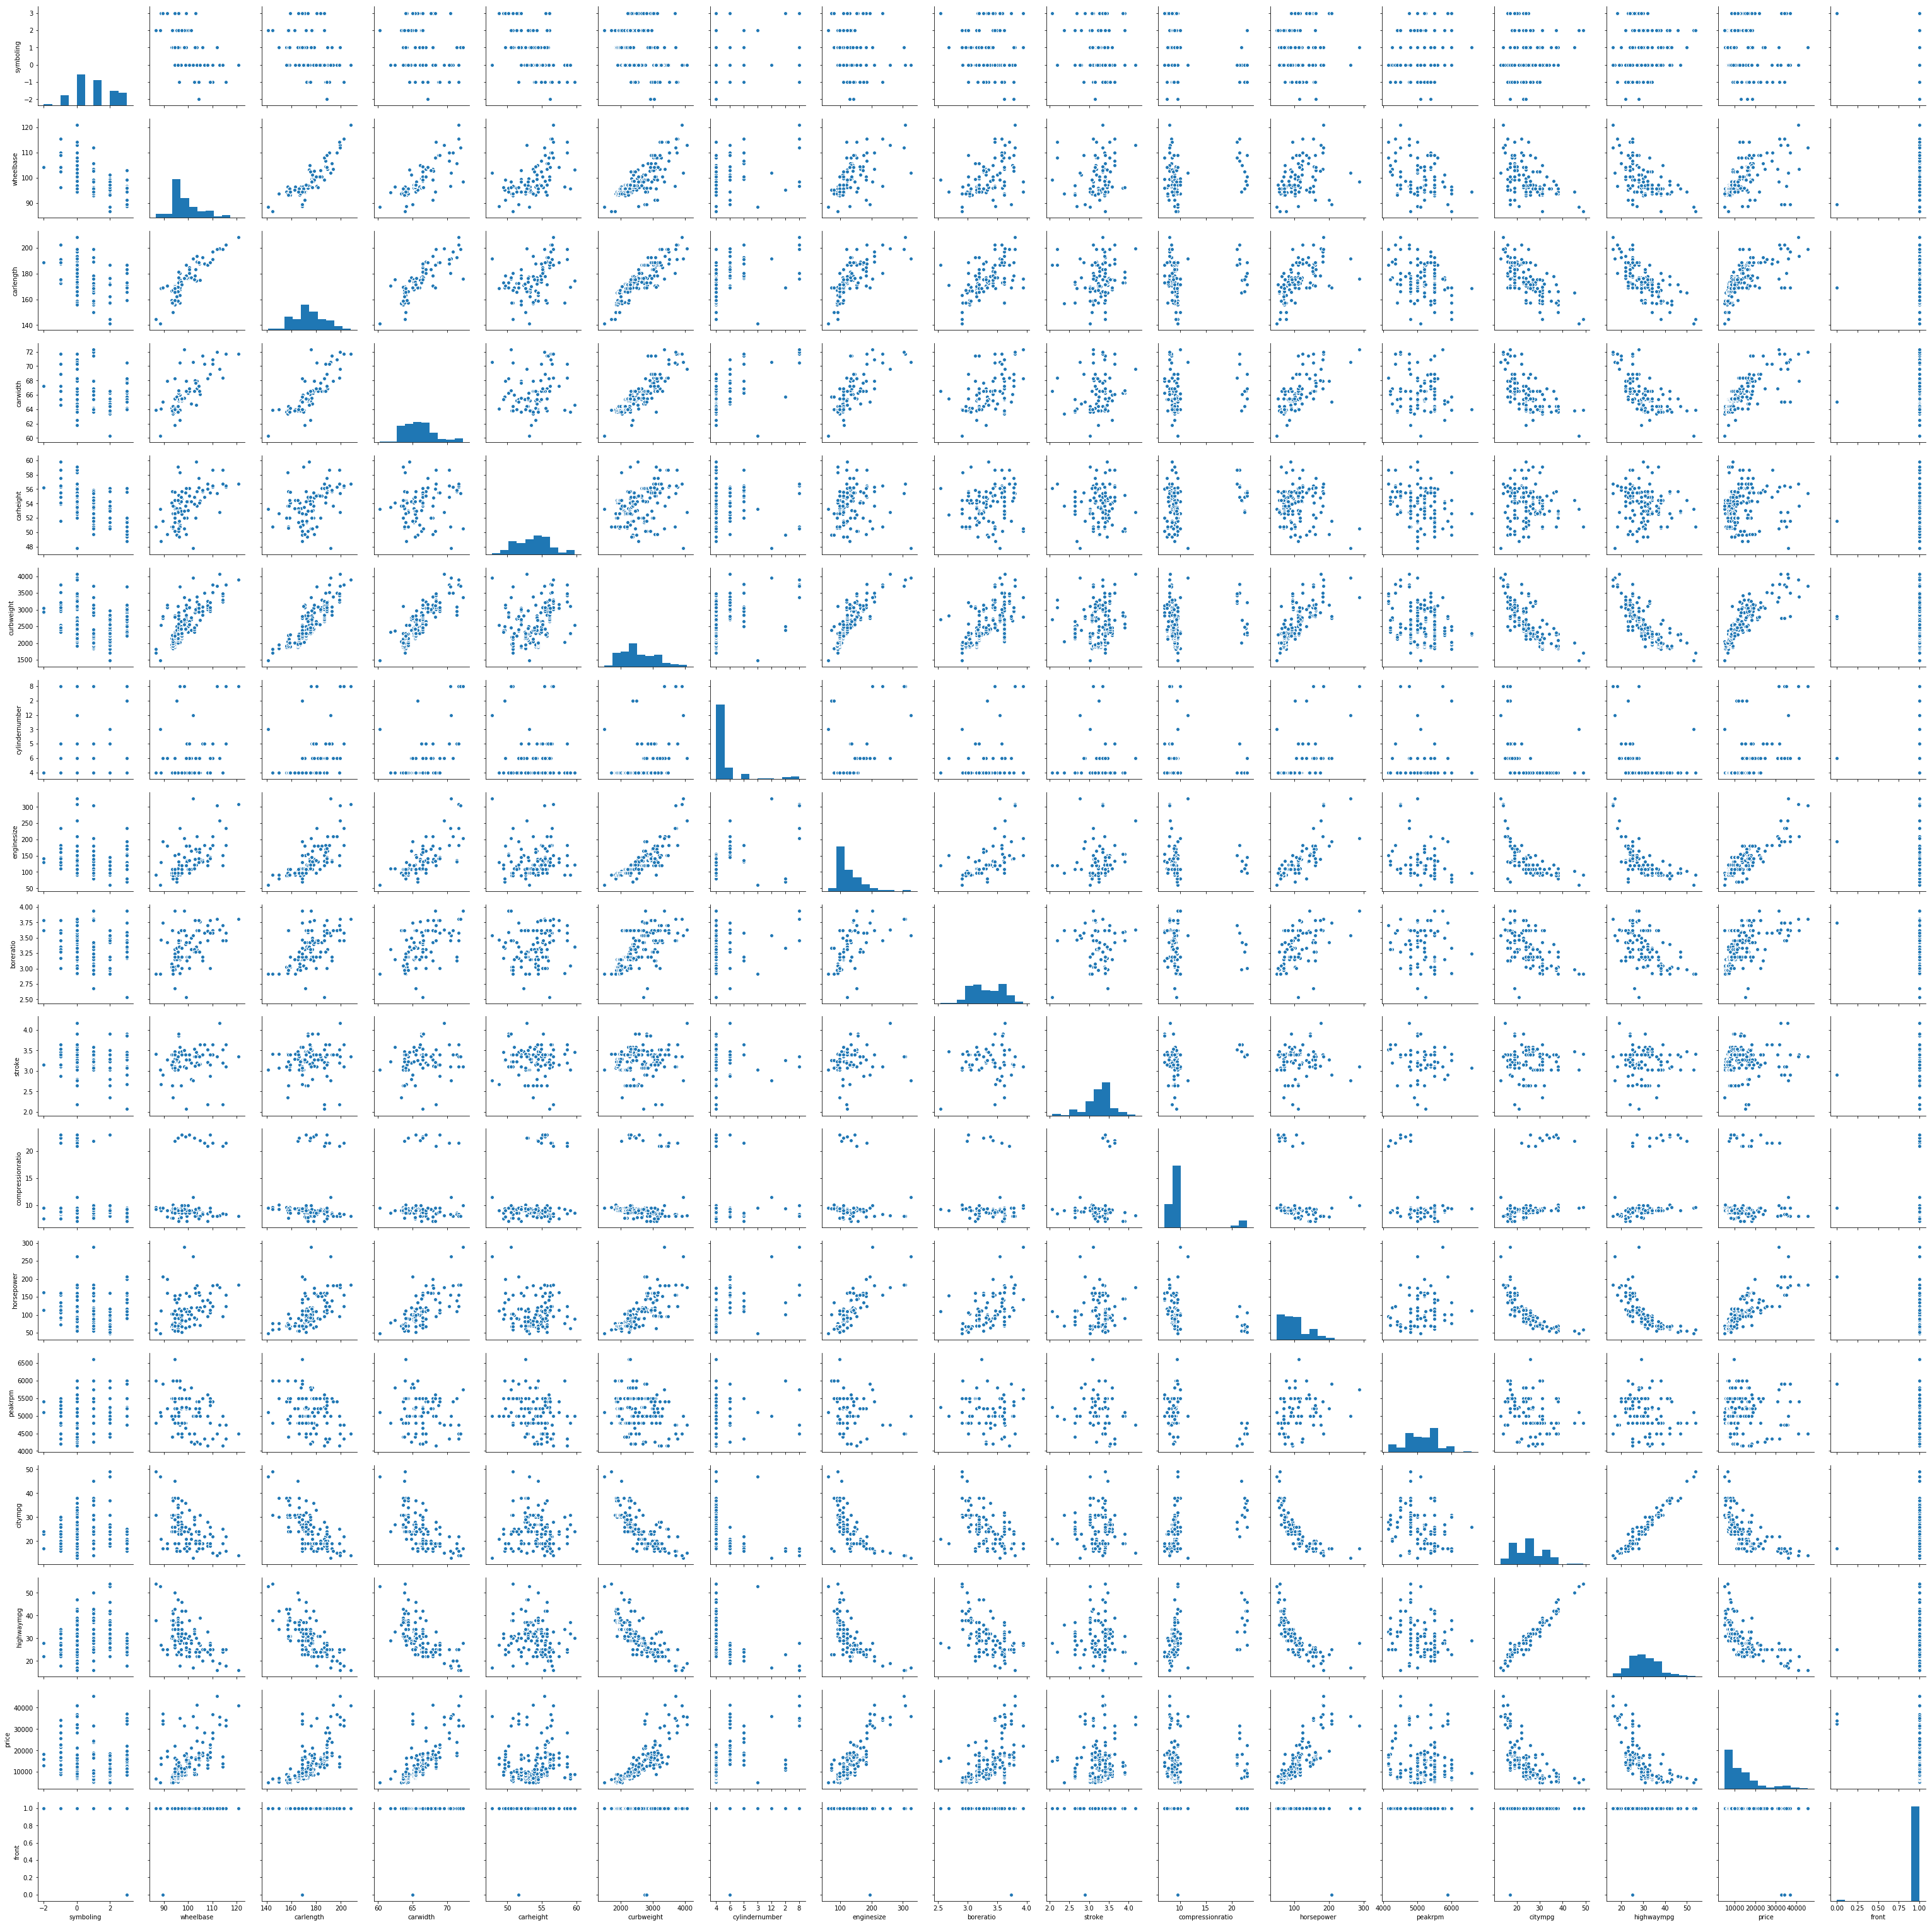

In [121]:
sns.pairplot(Car_df)
plt.show()

In [ ]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = Car_df)
plt.subplot(2,3,2)
sns.boxplot(x = 'carbody', y = 'price', data = Car_df)
plt.subplot(2,3,3)
sns.boxplot(x = 'drivewheel', y = 'price', data = Car_df)
plt.subplot(2,3,4)
sns.boxplot(x = 'cylindernumber', y = 'price', data = Car_df)
plt.subplot(2,3,5)
sns.boxplot(x = 'fuelsystem', y = 'price', data = Car_df)


In [184]:
#Modifying the Columns to fit Numerical Values


Cylinders = {'two':'2','three':'3', 'four':'4','five':'5','six':'6','eight':'8','twelve':'12'}
Car_df['cylindernumber'] = Car_df['cylindernumber'].replace(Cylinders)
cylinders = np.unique(Car_df['cylindernumber'])
cylinders

array(['12', '2', '3', '4', '5', '6', '8'], dtype=object)

###Creating Dummies for FuelType, Aspiration, Carbody and DriveWheel

In [185]:
fuel = pd.get_dummies(Car_df['fueltype'])
aspire = pd.get_dummies(Car_df['aspiration'])
body = pd.get_dummies(Car_df['carbody'])

In [186]:
fuel.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [187]:
fuel = pd.get_dummies(Car_df['fueltype'], drop_first = True)
Car_df = pd.concat([Car_df, fuel], axis = 1)
Car_df.drop(['fueltype'], axis = 1, inplace = True)
Car_df.head()

,symboling,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company,gas
0,3,std,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,1
1,3,std,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,1
2,1,std,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,1
3,2,std,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,1
4,2,std,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,1


In [188]:
aspire.head()

,std,turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [189]:
aspire.drop(['turbo'], axis = 1, inplace = True)
Car_df = pd.concat([Car_df, aspire], axis = 1)
Car_df.drop(['aspiration'], axis = 1, inplace = True)
Car_df.head()

,symboling,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company,gas,std
0,3,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,4,...,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,1,1
1,3,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,4,...,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,1,1
2,1,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,6,...,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,1,1
3,2,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,4,...,3.40,10.0,102,5500,24,30,13950.0,audi,1,1
4,2,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,5,...,3.40,8.0,115,5500,18,22,17450.0,audi,1,1


In [190]:
body.head()

,convertible,hardtop,hatchback,sedan,wagon
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


In [191]:
body = pd.get_dummies(Car_df['carbody'], drop_first = True)
Car_df = pd.concat([Car_df, body], axis = 1)
Car_df.drop(['carbody'], axis = 1, inplace = True)
Car_df.head()

,symboling,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,...,citympg,highwaympg,price,Company,gas,std,hardtop,hatchback,sedan,wagon
0,3,rwd,front,88.6,168.8,64.1,48.8,2548,4,130,...,21,27,13495.0,alfa-romero,1,1,0,0,0,0
1,3,rwd,front,88.6,168.8,64.1,48.8,2548,4,130,...,21,27,16500.0,alfa-romero,1,1,0,0,0,0
2,1,rwd,front,94.5,171.2,65.5,52.4,2823,6,152,...,19,26,16500.0,alfa-romero,1,1,0,1,0,0
3,2,fwd,front,99.8,176.6,66.2,54.3,2337,4,109,...,24,30,13950.0,audi,1,1,0,0,1,0
4,2,4wd,front,99.4,176.6,66.4,54.3,2824,5,136,...,18,22,17450.0,audi,1,1,0,0,1,0


In [192]:
drive = np.unique(Car_df['drivewheel'])
drive

array(['4wd', 'fwd', 'rwd'], dtype=object)

In [193]:
DriveW = pd.get_dummies(Car_df['drivewheel'])

In [194]:
DriveW.head()

,4wd,fwd,rwd
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,1,0,0


In [195]:
DriveW.drop(['4wd', 'fwd'], axis = 1, inplace = True)
Car_df = pd.concat([Car_df, DriveW], axis = 1)
Car_df.drop(['drivewheel'], axis = 1, inplace = True)
Car_df.head()

,symboling,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,fuelsystem,...,highwaympg,price,Company,gas,std,hardtop,hatchback,sedan,wagon,rwd
0,3,front,88.6,168.8,64.1,48.8,2548,4,130,mpfi,...,27,13495.0,alfa-romero,1,1,0,0,0,0,1
1,3,front,88.6,168.8,64.1,48.8,2548,4,130,mpfi,...,27,16500.0,alfa-romero,1,1,0,0,0,0,1
2,1,front,94.5,171.2,65.5,52.4,2823,6,152,mpfi,...,26,16500.0,alfa-romero,1,1,0,1,0,0,1
3,2,front,99.8,176.6,66.2,54.3,2337,4,109,mpfi,...,30,13950.0,audi,1,1,0,0,1,0,0
4,2,front,99.4,176.6,66.4,54.3,2824,5,136,mpfi,...,22,17450.0,audi,1,1,0,0,1,0,0


In [196]:
system = pd.get_dummies(Car_df['fuelsystem'])
system.head()

,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0


In [197]:
system.drop(['1bbl','2bbl','4bbl','idi','mfi','mpfi','spdi','spfi'], axis = 1, inplace = True)
Car_df = pd.concat([Car_df, system], axis = 1)
Car_df.drop(['fuelsystem'], axis = 1, inplace = True)
Car_df.head()


,symboling,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,highwaympg,price,Company,gas,std,hardtop,hatchback,sedan,wagon,rwd
0,3,front,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,27,13495.0,alfa-romero,1,1,0,0,0,0,1
1,3,front,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,27,16500.0,alfa-romero,1,1,0,0,0,0,1
2,1,front,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,26,16500.0,alfa-romero,1,1,0,1,0,0,1
3,2,front,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,30,13950.0,audi,1,1,0,0,1,0,0
4,2,front,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,22,17450.0,audi,1,1,0,0,1,0,0


In [198]:

#Dropping Engine Location and Company from the DF
Car_df.drop(['enginelocation'], axis = 1, inplace = True)
Car_df.head()


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,...,highwaympg,price,Company,gas,std,hardtop,hatchback,sedan,wagon,rwd
0,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,27,13495.0,alfa-romero,1,1,0,0,0,0,1
1,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,27,16500.0,alfa-romero,1,1,0,0,0,0,1
2,1,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,...,26,16500.0,alfa-romero,1,1,0,1,0,0,1
3,2,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,...,30,13950.0,audi,1,1,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,...,22,17450.0,audi,1,1,0,0,1,0,0


In [199]:
Car_df.drop(['Company'], axis = 1, inplace = True)
Car_df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,...,citympg,highwaympg,price,gas,std,hardtop,hatchback,sedan,wagon,rwd
0,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,21,27,13495.0,1,1,0,0,0,0,1
1,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,21,27,16500.0,1,1,0,0,0,0,1
2,1,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,...,19,26,16500.0,1,1,0,1,0,0,1
3,2,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,...,24,30,13950.0,1,1,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,...,18,22,17450.0,1,1,0,0,1,0,0


In [ ]:
Car_df['cylindernumber'] = Car_df['cylindernumber'].astype(int)


In [224]:
Car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 23 columns):
symboling           205 non-null int64
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
cylindernumber      205 non-null int32
enginesize          205 non-null int64
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg          205 non-null int64
price               205 non-null float64
gas                 205 non-null uint8
std                 205 non-null uint8
hardtop             205 non-null uint8
hatchback           205 non-null uint8
sedan               205 non-null uint8
wagon               205 non-null uint8
rwd                 2

In [364]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(Car_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [365]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [366]:
num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight','price', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [367]:
df_train.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,...,citympg,highwaympg,price,gas,std,hardtop,hatchback,sedan,wagon,rwd
122,1,0.244828,0.426016,0.291667,0.265487,0.272692,4,0.139623,0.230159,0.525253,...,0.500000,0.567568,0.068818,1,1,0,0,1,0,0
125,3,0.272414,0.452033,0.666667,0.212389,0.500388,4,0.339623,1.000000,0.464646,...,0.166667,0.270270,0.466890,1,1,0,1,0,0,1
166,1,0.272414,0.448780,0.308333,0.424779,0.314973,4,0.139623,0.444444,0.449495,...,0.361111,0.324324,0.122110,1,1,0,1,0,0,1
1,3,0.068966,0.450407,0.316667,0.088496,0.411171,4,0.260377,0.626984,0.247475,...,0.222222,0.270270,0.314446,1,1,0,0,0,0,1
199,-1,0.610345,0.775610,0.575000,0.858407,0.647401,4,0.260377,0.746032,0.484848,...,0.111111,0.135135,0.382131,1,0,0,0,0,1,1


In [368]:
df_train.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,...,citympg,highwaympg,price,gas,std,hardtop,hatchback,sedan,wagon,rwd
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.797203,0.411141,0.525476,0.461655,0.509004,0.407878,4.405594,0.241351,0.497946,0.535389,...,0.344211,0.374976,0.219310,0.909091,0.818182,0.020979,0.342657,0.475524,0.132867,0.349650
std,1.195999,0.205581,0.204848,0.184517,0.215378,0.211269,1.158178,0.154619,0.207140,0.157843,...,0.186165,0.188477,0.215682,0.288490,0.387050,0.143818,0.476266,0.501156,0.340624,0.478536
min,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.272414,0.399187,0.304167,0.353982,0.245539,4.000000,0.135849,0.305556,0.464646,...,0.166667,0.216216,0.067298,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.341379,0.502439,0.425000,0.522124,0.355702,4.000000,0.184906,0.500000,0.545455,...,0.333333,0.378378,0.140343,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.503448,0.669919,0.550000,0.668142,0.559542,4.000000,0.301887,0.682540,0.611111,...,0.500000,0.527027,0.313479,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


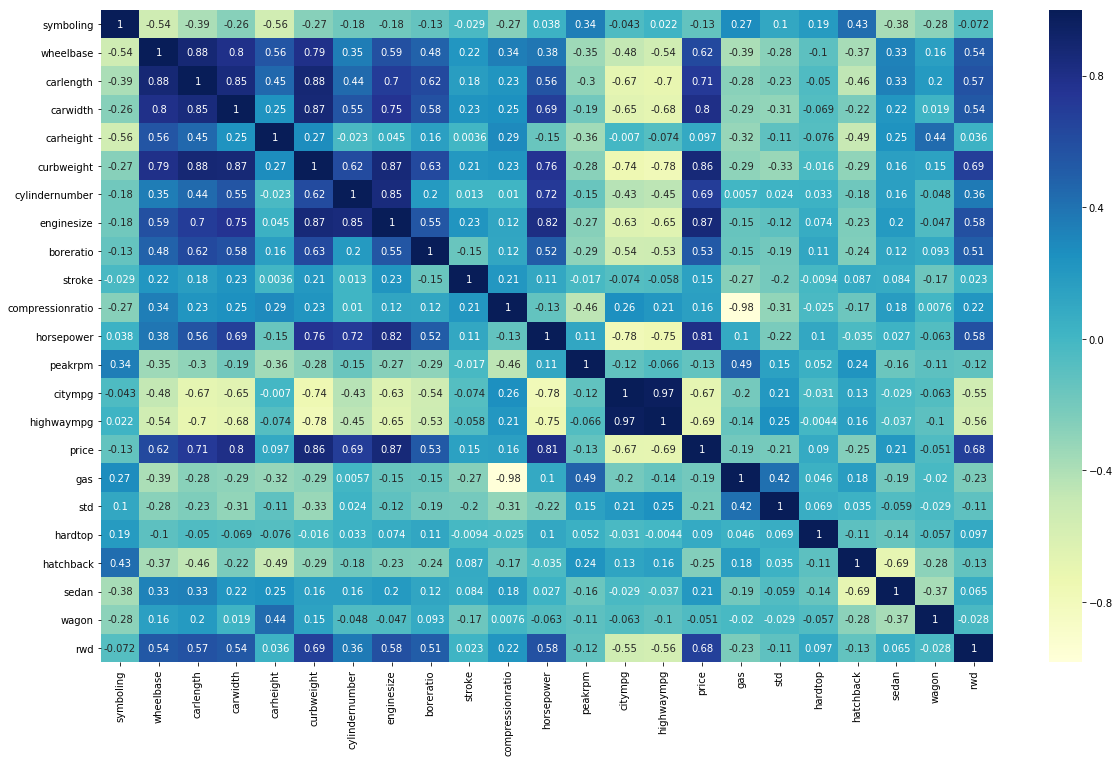

In [369]:
plt.figure(figsize = (20, 12))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [ ]:
#As we can see Price has high correlation with Engine Size, Curb Weight, Cylinder Number, CAr width and Car length. Will be trying these deatures to build the model.

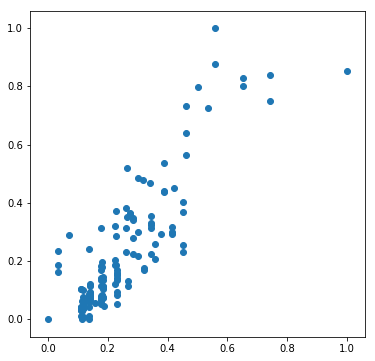

In [370]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.enginesize, df_train.price)
plt.show()

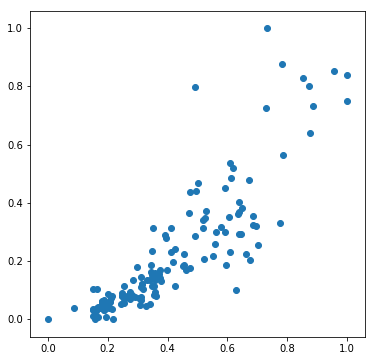

In [371]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.curbweight, df_train.price)
plt.show()

In [154]:
#from the scatter plot we will pick engine size and do to fit a regression line


In [372]:
y_train = df_train.pop('price')
X_train = df_train

In [373]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['enginesize']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [374]:
lr.params

const        -0.072888
enginesize    1.210676
dtype: float64

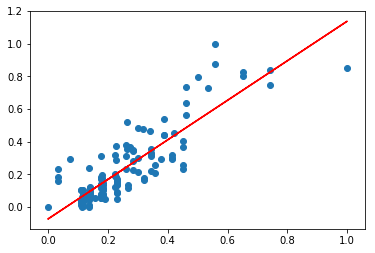

In [375]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], -0.073 + 1.210*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [376]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     430.5
Date:                Sat, 02 Feb 2019   Prob (F-statistic):           1.09e-44
Time:                        16:13:28   Log-Likelihood:                 117.01
No. Observations:                 143   AIC:                            -230.0
Df Residuals:                     141   BIC:                            -224.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0729      0.017     -4.362      0.0

In [377]:
X_train_lm = X_train[['enginesize', 'curbweight','carlength','cylindernumber','boreratio','wheelbase','carwidth','rwd','horsepower']]


In [378]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const            -0.084752
enginesize        0.615823
curbweight        0.134686
carlength        -0.061461
cylindernumber   -0.010881
boreratio        -0.077511
wheelbase        -0.013630
carwidth          0.313037
rwd               0.082914
horsepower        0.226242
dtype: float64

In [379]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     80.90
Date:                Sat, 02 Feb 2019   Prob (F-statistic):           1.47e-49
Time:                        16:15:29   Log-Likelihood:                 150.50
No. Observations:                 143   AIC:                            -281.0
Df Residuals:                     133   BIC:                            -251.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0848      0.064     -1.

In [380]:
X_train_lm = X_train[['enginesize', 'curbweight','carwidth','rwd','horsepower']]

In [381]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [382]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,42.88
2,carwidth,22.34
0,enginesize,18.35
4,horsepower,9.38
3,rwd,2.99


In [383]:
#dropping curbweight from the variables
X_train_lm = X_train[['enginesize','carlength','cylindernumber','boreratio','wheelbase','carwidth','rwd','horsepower']]



In [384]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const            -0.074443
enginesize        0.701910
carlength        -0.023226
cylindernumber   -0.015150
boreratio        -0.084004
wheelbase         0.004724
carwidth          0.333617
rwd               0.089207
horsepower        0.255055
dtype: float64

In [385]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     90.88
Date:                Sat, 02 Feb 2019   Prob (F-statistic):           2.46e-50
Time:                        16:15:55   Log-Likelihood:                 149.96
No. Observations:                 143   AIC:                            -281.9
Df Residuals:                     134   BIC:                            -255.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0744      0.063     -1.

In [386]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,73.49
1,enginesize,11.16
2,carlength,7.14
5,wheelbase,6.50
3,cylindernumber,6.41
6,carwidth,5.68
8,horsepower,4.64
4,boreratio,2.53
7,rwd,2.02


In [387]:
#dropping Wheelbase due to high P-value
X_train_lm = X_train[['enginesize','carlength','cylindernumber','boreratio','carwidth','rwd','horsepower']]


In [388]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

lr_2.params

const            -0.074539
enginesize        0.702751
carlength        -0.020162
cylindernumber   -0.015176
boreratio        -0.084478
carwidth          0.335729
rwd               0.089537
horsepower        0.252792
dtype: float64

In [389]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     104.6
Date:                Sat, 02 Feb 2019   Prob (F-statistic):           2.31e-51
Time:                        16:16:13   Log-Likelihood:                 149.96
No. Observations:                 143   AIC:                            -283.9
Df Residuals:                     135   BIC:                            -260.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0745      0.063     -1.

In [390]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,73.42
1,enginesize,11.04
3,cylindernumber,6.41
5,carwidth,4.64
2,carlength,4.43
7,horsepower,3.68
4,boreratio,2.47
6,rwd,1.85


In [391]:
#will drop bore ratio and add engine size

X_train_lm = X_train[['enginesize','carlength','cylindernumber','carwidth','rwd','horsepower']]


In [392]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

lr_3.params

const            -0.132378
enginesize        0.603800
carlength        -0.036710
cylindernumber   -0.002427
carwidth          0.333427
rwd               0.088402
horsepower        0.224825
dtype: float64

In [393]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     120.5
Date:                Sat, 02 Feb 2019   Prob (F-statistic):           6.31e-52
Time:                        16:16:30   Log-Likelihood:                 148.74
No. Observations:                 143   AIC:                            -283.5
Df Residuals:                     136   BIC:                            -262.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1324      0.050     -2.

In [394]:
#Cylindernumber has high P-value
#will drop bore ratio and add engine size

X_train_lm = X_train[['enginesize','carlength','carwidth','rwd','horsepower']]

In [395]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

lr_4.params

const        -0.140289
enginesize    0.584982
carlength    -0.033352
carwidth      0.333625
rwd           0.089301
horsepower    0.223024
dtype: float64

In [396]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     145.7
Date:                Sat, 02 Feb 2019   Prob (F-statistic):           5.04e-53
Time:                        16:16:43   Log-Likelihood:                 148.73
No. Observations:                 143   AIC:                            -285.5
Df Residuals:                     137   BIC:                            -267.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1403      0.022     -6.338      0.0

In [397]:
#CarLength has high P-value dropping it
X_train_lm = X_train[['enginesize','carwidth','rwd','horsepower']]

In [398]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

lr_5.params

const        -0.144052
enginesize    0.574244
carwidth      0.306518
rwd           0.086953
horsepower    0.232545
dtype: float64

In [399]:
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     183.1
Date:                Sat, 02 Feb 2019   Prob (F-statistic):           3.88e-54
Time:                        16:16:54   Log-Likelihood:                 148.61
No. Observations:                 143   AIC:                            -287.2
Df Residuals:                     138   BIC:                            -272.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1441      0.021     -7.018      0.0

In [400]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,7.94
1,enginesize,3.93
4,horsepower,3.24
2,carwidth,2.46
3,rwd,1.63


In [401]:
#adding curbweight and removing RWD 
X_train_lm = X_train[['enginesize','carwidth','horsepower', 'curbweight']]

In [402]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr_6 = sm.OLS(y_train, X_train_lm).fit()

lr_6.params

const        -0.158230
enginesize    0.486169
carwidth      0.207804
horsepower    0.282452
curbweight    0.245334
dtype: float64

In [403]:
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     164.3
Date:                Sat, 02 Feb 2019   Prob (F-statistic):           1.91e-51
Time:                        16:17:10   Log-Likelihood:                 142.17
No. Observations:                 143   AIC:                            -274.3
Df Residuals:                     138   BIC:                            -259.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1582      0.021     -7.502      0.0

In [289]:
# Will be going with the linear model 6, as the T-value and P-value are within the limit the adj- r2 is also above 82 percent.

In [404]:
y_train_price = lr_6.predict(X_train_lm)

Text(0.5,0,'Errors')

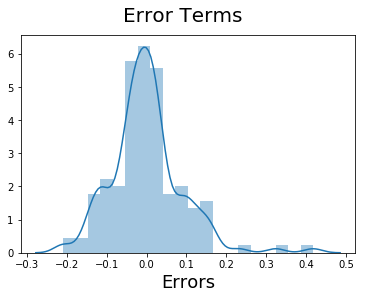

In [405]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [406]:
#Creating the Testing DF
num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight','price', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [407]:
df_test.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,...,citympg,highwaympg,price,gas,std,hardtop,hatchback,sedan,wagon,rwd
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.919355,0.370121,0.486741,0.375212,0.454249,0.371743,4.322581,0.228835,0.667691,0.654504,...,0.450941,0.466701,0.209644,0.887097,0.822581,0.080645,0.338710,0.451613,0.096774,0.419355
std,1.358620,0.179970,0.183964,0.208977,0.234487,0.222354,0.882883,0.188416,0.228484,0.173913,...,0.258014,0.217041,0.210911,0.319058,0.385142,0.274512,0.477134,0.501716,0.298064,0.497482
min,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.265306,0.389764,0.221053,0.264423,0.219125,4.000000,0.126638,0.515873,0.590164,...,0.208333,0.290323,0.076536,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.327988,0.475591,0.326316,0.485577,0.344065,4.000000,0.183406,0.674603,0.699454,...,0.416667,0.451613,0.136847,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.482507,0.642126,0.421053,0.605769,0.540726,4.000000,0.287118,0.857143,0.759563,...,0.625000,0.580645,0.280049,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
